In [1]:
!pip install geopandas
!pip install mapclassify
!pip install earthpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 27.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 51.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 40.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 KB 2.6 MB/s eta 0:00:00
  Attempting uninstall: click
    Found existing installation: click 7.1.2
    Uninstalling click-7.1.2:
      Successfully uninstalled click-7.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires click<8.0,>=5.1, but you have click 8.1.3 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/col

In [2]:
import matplotlib.pyplot as plt
import geopandas as gpd

In [3]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

In [4]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


**Fields: pop_est (estimated population), continent (self-explanatory), name (name of country), iso_a3 (name abbreviation), gdp_md_est (modern GDP estimation), and geometry (what kind of shapefile is it and the coordinates).**

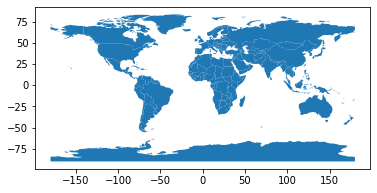

In [5]:
world.plot();

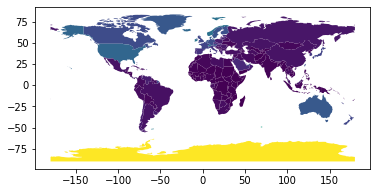

In [6]:
world = world[(world.pop_est > 0) & (world.name != 'Antartica')]

world['gdp_per_cap'] = world.gdp_md_est / world.pop_est

world.plot(column = 'gdp_per_cap');

**plot is what creates the map. Matplotlib is the library to which it belongs.**

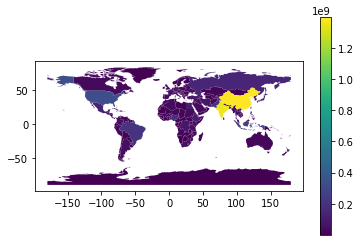

In [7]:
fig, ax = plt.subplots(1, 1)

world.plot('pop_est', ax = ax, legend = True)

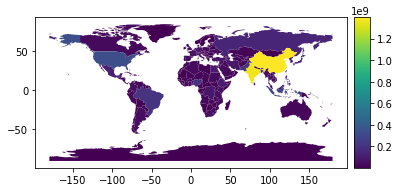

In [8]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(1, 1)

divider = make_axes_locatable(ax)

cax = divider.append_axes("right", size = "5%", pad = 0.1)

world.plot(column = 'pop_est', ax = ax, legend = True, cax = cax)

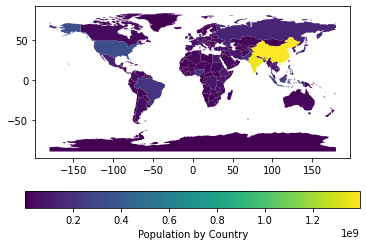

In [9]:
fig, ax = plt.subplots(1, 1)
world.plot(column = 'pop_est', ax = ax, legend = True, legend_kwds = {
    'label': "Population by Country", 'orientation': "horizontal"
} )

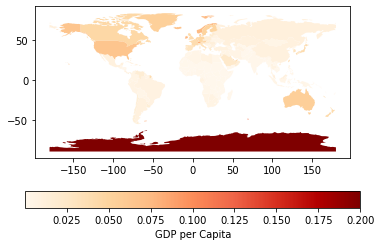

In [10]:
fig, ax = plt.subplots(1, 1)
world.plot(column = 'gdp_per_cap', ax = ax, legend = True, cmap = 'OrRd',
           legend_kwds = {'label': "GDP per Capita",
                          'orientation': "horizontal"})

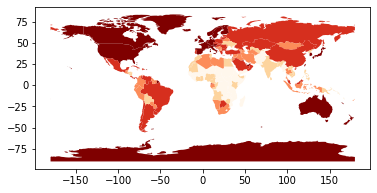

In [11]:
world.plot(column = 'gdp_per_cap', cmap = 'OrRd', scheme = 'quantiles');

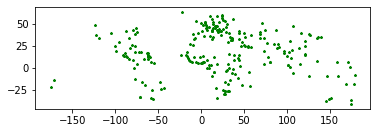

In [12]:
cities.plot(marker = '*', color = 'green', markersize = 5)

In [13]:
cities = cities.to_crs(world.crs)

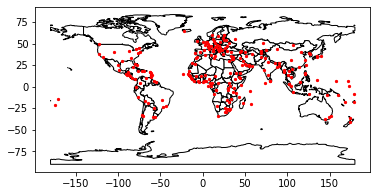

In [14]:
base = world.plot(color = 'white', edgecolor = 'black')

cities.plot(ax = base, marker = 'o', color = 'red', markersize = 5);

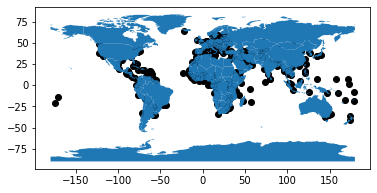

In [15]:
ax = cities.plot(color = 'k')
world.plot(ax = ax);

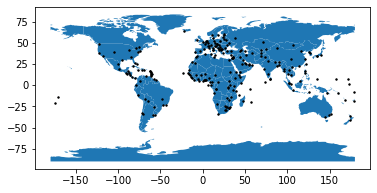

In [16]:
ax = cities.plot(color = 'k', zorder = 2, markersize = 2)
world.plot(ax = ax, zorder = 1);

In [17]:
import os
import folium
import geopandas as gpd
import earthpy as et

data = et.data.get_data('spatial-vector-lidar')
os.chdir(os.path.join(et.io.HOME, "earth-analytics"))

Extracted output to /root/earth-analytics/data/spatial-vector-lidar/.


In [18]:
SJER_plot_locations_path = os.path.join("data", "spatial-vector-lidar",
                                        "california", "neon-sjer-site",
                                        "vector_data", "SJER_plot_centroids.shp")

SJER_plot_locations = gpd.read_file(SJER_plot_locations_path)

In [19]:
SJER_plot_locations_json = SJER_plot_locations.to_crs(epsg = 4326).to_json()
SJER_map = folium.Map([37.12, -119.737], zoom_start = 14)

points = folium.features.GeoJson(SJER_plot_locations_json)

SJER_map.add_child(points)

SJER_map